In [75]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the config of the plots we will create

# Read in the data

df = pd.read_csv(r'C:\Users\Davis Stroud\Documents\Data Analyst Portfolio Project\Python\Movie Analysis\movies.csv')

In [14]:
# Lets look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [17]:
#Check for missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [18]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [28]:
#Change data type of budget from float to int

df['budget'] = df['budget'].astype('object')

df['gross'] = df['gross'].astype('object')

In [50]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget       object
gross       float64
company      object
runtime     float64
dtype: object

In [102]:
df = df.sort_values(by=['gross'], inplace=False, ascending=True)

In [71]:
pd.set_option('display.max_rows', None)

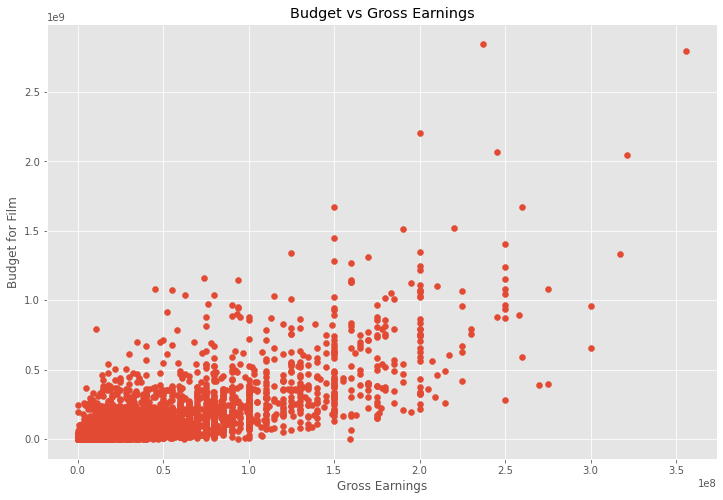

In [78]:
# Scatter plot w/ budget vs gross revenue


plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [79]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Text(0, 0.5, 'Budget for Film')

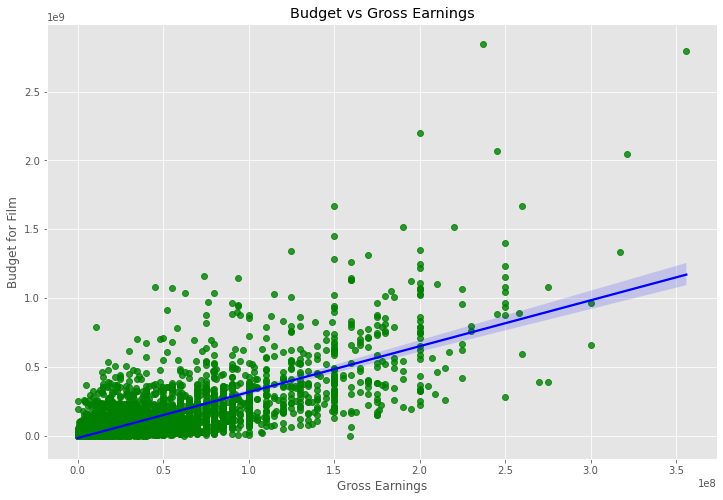

In [89]:
# Plot budget vs the Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "green"}, line_kws={"color":"blue"})

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

In [91]:
# Let's start looking at correlation using a correlation matrix

df.corr(method='pearson') # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

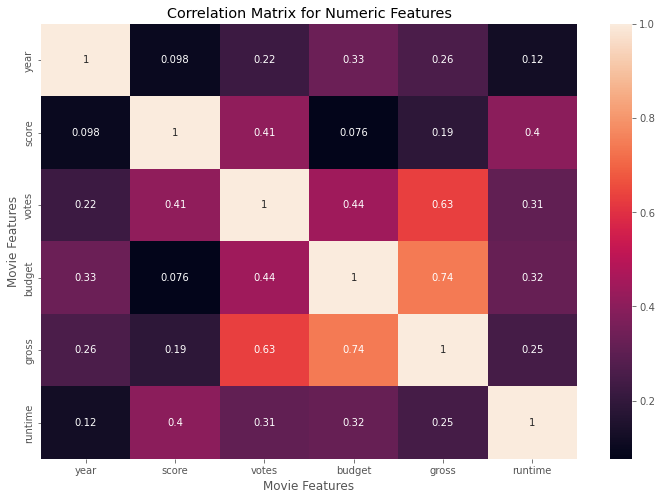

In [94]:
# Create a heatmap to make the matrix easier to read

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

In [95]:
# Looks as company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [122]:
# For loop to make the company object a numerical value
# Objects wont show in the correlation matrix so it is important to change the dtpe to a numerical value to observe the correlation of the full df

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):                               # taking all dtypes that are objects in the df
        df_numerized[col_name] = df_numerized[col_name].astype('category')      # changing the column type from object to category
        df_numerized[col_name] = df_numerized[col_name].cat.codes               # cat.codes assigns a randomo number for each dtype with object
                    
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3203,6990,5,4,1997,2811,5.7,5800.0,961,229,2758,55,15000000.0,309.0,821,85.0
2417,3406,-1,6,1993,85,7.3,5100.0,33,1718,2563,27,11900000.0,596.0,796,134.0
7580,4664,3,5,2019,1835,5.2,735.0,1445,2203,2278,55,NaN,682.0,1992,93.0
7625,6720,-1,4,2019,1149,5.7,320.0,2546,2565,1915,55,NaN,790.0,2308,104.0
3818,3360,6,4,2000,1119,6.5,5200.0,730,1123,2319,54,NaN,1400.0,477,103.0


<function matplotlib.pyplot.show(close=None, block=None)>

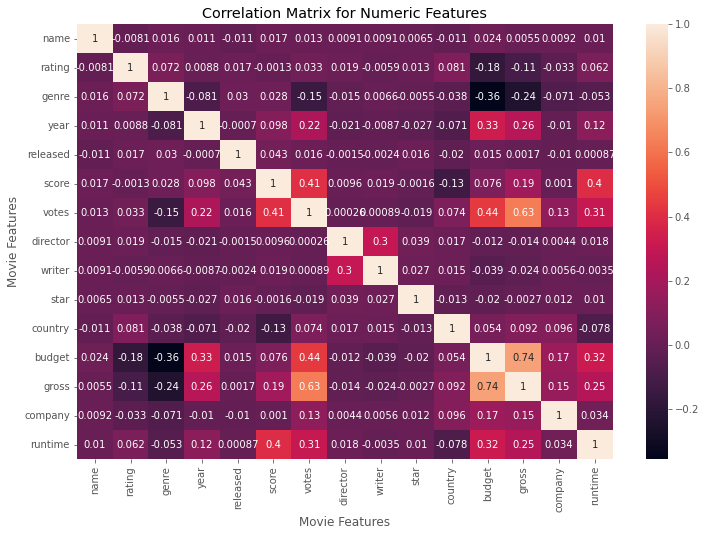

In [105]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

In [106]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


In [107]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [126]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [118]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64